<a href="https://colab.research.google.com/github/aswa09/EVA-4/blob/master/S9/Quiz_S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-05-30 22:36:36.350932


##Import Libraries

In [2]:
import torch
!pip install torchsummary
from torchsummary import summary
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim
import sys
import torch.nn as nn
import os

##Mount Google Drive to get files

In [3]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [4]:
!rm -rf '/content/drive/My Drive/colab_notebooks/S9/__pycache__'
!ls -lrt '/content/drive/My Drive/colab_notebooks/S9/'

total 200
-rw------- 1 root root    594 May 18 10:44 visualise_loss_acc.py
-rw------- 1 root root   1512 May 21 08:14 training.py
-rw------- 1 root root   1332 May 21 09:34 testing.py
-rw------- 1 root root   1644 May 30 18:36 train_test_loader.py
drwx------ 2 root root   4096 May 30 18:38 data
-rw------- 1 root root   4085 May 30 18:41 resnet18.py
-rw------- 1 root root    722 May 30 19:02 albumentation_transforms.py
-rw------- 1 root root   1475 May 30 21:03 get_images.py
-rw------- 1 root root   6767 May 30 21:19 gradcam.py
-rw------- 1 root root 176948 May 30 21:56 EVA4_S9.ipynb
-rw------- 1 root root   2988 May 30 22:22 quiz9_base_model.py


##Add Google Drive path to system path

In [5]:
os.chdir('./drive/My Drive/colab_notebooks/S9/')

!ls

albumentation_transforms.py  gradcam.py		  training.py
data			     quiz9_base_model.py  train_test_loader.py
EVA4_S9.ipynb		     resnet18.py	  visualise_loss_acc.py
get_images.py		     testing.py


##Import python files

In [0]:
import train_test_loader as ttl
import quiz9_base_model as bm
import training as trn
import testing as tst
import visualise_loss_acc as vis
import gradcam as gc
import get_images as gc_img

##Main Function

In [0]:
def main(classes):

  train_loader, test_loader,test_transform = ttl.get_train_test(classes)

  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
  print(device)

  model = bm.S9Quiz().to(device)
  summary(model, input_size=(3, 32, 32))

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
  scheduler = StepLR(optimizer, step_size=35, gamma=0.1)
  EPOCHS=15
 
  test_loss=[]
  test_accuracy=[]
  for epoch in range(EPOCHS):
      print("EPOCH:", epoch + 1)
      train_losses,train_acc=trn.train(model, device, train_loader, optimizer,EPOCHS,criterion,l1=1e-6,l2=1e-3)
      scheduler.step()
      test_losses,test_acc=tst.test(model, device, test_loader,criterion)

      test_loss.append(test_losses)
      test_accuracy.append(test_acc)
  
  vis.plot_acc_loss(test_loss,test_accuracy)
  
  # ##gradcam##

  # misclass, correct=gc_img.get_images(model,device, test_loader,batch_size=128,num_imgs=2)
  # target_layers = ["layer1","layer2","layer3","layer4"]
  # viz_cam = gc.VisualizeCam(model,classes, target_layers)

  # num_img = len(misclass)

  # incorrect_pred_imgs = []
  # inc_image_for_gradcam = []
  # for i in range(num_img):
  #   incorrect_pred_imgs.append(torch.as_tensor(misclass[i][0]))
  #   inc_image_for_gradcam.append(misclass[i])

  # print('\n--GRADCAM FOR MISCLASSIFIED IMAGES--')
  # viz_cam(torch.stack(incorrect_pred_imgs), inc_image_for_gradcam, target_layers, metric="incorrect")

##Calling Main

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/391 [00:00<?, ?it/s]

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
        MaxPool2d-12           [-1, 64, 16, 16]               0
           Conv2d-13           [-1, 64, 16, 16]          36,864
             ReLU-14           [-1

Loss=1.6567020416259766 Batch_id=390 Accuracy=43.07: 100%|██████████| 391/391 [00:33<00:00, 11.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 5136/10000 (51.36%)

EPOCH: 2


Loss=1.2615580558776855 Batch_id=390 Accuracy=57.99: 100%|██████████| 391/391 [00:33<00:00, 11.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 6308/10000 (63.08%)

EPOCH: 3


Loss=1.1062438488006592 Batch_id=390 Accuracy=64.53: 100%|██████████| 391/391 [00:33<00:00, 11.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6806/10000 (68.06%)

EPOCH: 4


Loss=0.975237250328064 Batch_id=390 Accuracy=68.80: 100%|██████████| 391/391 [00:33<00:00, 11.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7285/10000 (72.85%)

EPOCH: 5


Loss=1.0133421421051025 Batch_id=390 Accuracy=71.41: 100%|██████████| 391/391 [00:33<00:00, 11.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7625/10000 (76.25%)

EPOCH: 6


Loss=0.9675486087799072 Batch_id=390 Accuracy=73.75: 100%|██████████| 391/391 [00:33<00:00, 11.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7791/10000 (77.91%)

EPOCH: 7


Loss=0.8534090518951416 Batch_id=390 Accuracy=75.44: 100%|██████████| 391/391 [00:33<00:00, 11.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7735/10000 (77.35%)

EPOCH: 8


Loss=0.7895926833152771 Batch_id=390 Accuracy=76.41: 100%|██████████| 391/391 [00:32<00:00, 11.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8019/10000 (80.19%)

EPOCH: 9


Loss=0.6998517513275146 Batch_id=390 Accuracy=77.62: 100%|██████████| 391/391 [00:33<00:00, 11.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8100/10000 (81.00%)

EPOCH: 10


Loss=0.9256702661514282 Batch_id=390 Accuracy=78.62: 100%|██████████| 391/391 [00:32<00:00, 11.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8215/10000 (82.15%)

EPOCH: 11


Loss=0.8146381378173828 Batch_id=390 Accuracy=79.69: 100%|██████████| 391/391 [00:33<00:00, 11.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8075/10000 (80.75%)

EPOCH: 12


Loss=0.6522727012634277 Batch_id=390 Accuracy=80.16: 100%|██████████| 391/391 [00:32<00:00, 11.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8305/10000 (83.05%)

EPOCH: 13


Loss=0.7234589457511902 Batch_id=390 Accuracy=81.05: 100%|██████████| 391/391 [00:33<00:00, 11.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8436/10000 (84.36%)

EPOCH: 14


Loss=0.6680245399475098 Batch_id=390 Accuracy=81.40: 100%|██████████| 391/391 [00:33<00:00, 11.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8301/10000 (83.01%)

EPOCH: 15


Loss=0.7915332317352295 Batch_id=390 Accuracy=81.65: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]



Test set: Average loss: 0.0036, Accuracy: 8428/10000 (84.28%)



Loss=0.8359184861183167 Batch_id=102 Accuracy=74.92:  26%|██▋       | 103/391 [09:39<27:01,  5.63s/it]


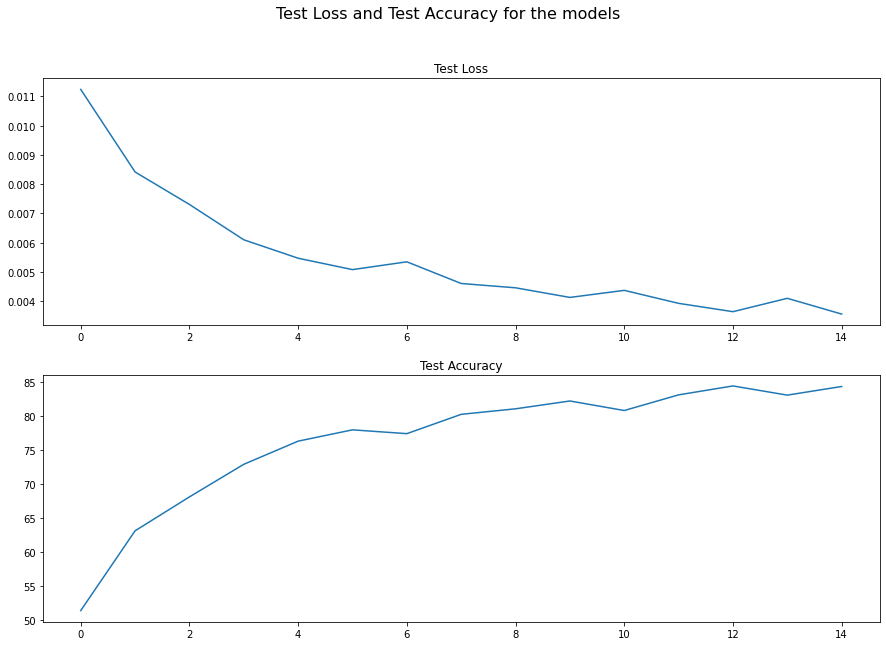

In [11]:
if __name__ == '__main__':
  from tqdm import tqdm
  if hasattr(tqdm, '_instances'):
    tqdm._instances.clear()

  classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
    'frog', 'horse', 'ship', 'truck')
  
  main(classes)